In [1]:
import numpy as np
import pandas as pd

from codex import Codex

In [2]:
sizes = Codex.SIZES
codes = Codex.CODES

# Data exploration
Load our data and do basic exploratory analysis.

In [3]:
for size in sizes:
    codex = Codex(size=size)
    
    train, valid, test = [
        codex.split(split) for split in ('train', 'valid', 'test')]
    triples = codex.triples()
    
    print(codex.name())
    
    print(
        ' ', len(codex.entities()), 'entities /',
        len(codex.relations()), 'relations'
    )
        
    print(
        ' ', len(train), 'train /',
        len(valid), 'validation /',
        len(test), 'test'
    )
    print(' ', len(triples), 'total triples')

CoDEx-S
  2034 entities / 42 relations
  32888 train / 1827 validation / 1828 test
  36543 total triples
CoDEx-M
  17050 entities / 51 relations
  185584 train / 10310 validation / 10311 test
  206205 total triples
CoDEx-L
  77951 entities / 69 relations
  551193 train / 30622 validation / 30622 test
  612437 total triples


Inspect a single entity.

In [4]:
eid = 'Q51'

for code in codes:
    codex = Codex(code=code)
    print(codex.entity_label(eid))

القارة القطبية الجنوبية
Antarktika
Antarctica
Antártida
Антарктида
南极洲


In [5]:
codex = Codex(code='en')
print('From {}:'.format(codex.entity_wikipedia_url(eid)))
print('  "{}"'.format(codex.entity_extract(eid)))

From https://en.wikipedia.org/wiki/Antarctica:
  "Antarctica ( or  (listen)) is Earth's southernmost continent. It contains the geographic South Pole and is situated in the Antarctic region of the Southern Hemisphere, almost entirely south of the Antarctic Circle, and is surrounded by the Southern Ocean. At 14,200,000 square kilometres (5,500,000 square miles), it is the fifth-largest continent and nearly twice the size of Australia. At 0.00008 people per square kilometre, it is by far the least densely populated continent. About 98% of Antarctica is covered by ice that averages 1.9 km (1.2 mi; 6,200 ft) in thickness, which extends to all but the northernmost reaches of the Antarctic Peninsula.
Antarctica, on average, is the coldest, driest, and windiest continent, and has the highest average elevation of all the continents. Most of Antarctica is a polar desert, with annual precipitation of 200 mm (7.9 in) along the coast and far less inland; there has been no rain there for almost 2 m

In [6]:
codex = Codex(code='es')
print('From {}:'.format(codex.entity_wikipedia_url(eid)))
print('  "{}"'.format(codex.entity_extract(eid)))

From https://es.wikipedia.org/wiki/Ant%C3%A1rtida:
  "La Antártida[2]​ o continente antártico (del adjetivo latino antarcticus, y este a su vez del griego ανταρκτικός antarktikós, ‘opuesto al Ártico’),[2]​ también denominada Antártica en Chile,[2]​ es el continente más austral de la Tierra. Está situada completamente en el hemisferio sur, casi enteramente al sur del círculo polar antártico y está rodeada por el océano Antártico. Contiene el polo sur geográfico, por lo que de manera coloquial y por extensión también es conocida de manera errónea como el polo sur. Con 14 000 000 km², es el cuarto continente más grande después de Asia, América y África.[1]​ En comparación con Oceanía, la Antártida es casi dos veces su tamaño. Alrededor del 98 % de la Antártida está cubierta de hielo, que tiene un promedio de 1,9 km de espesor,[3]​ que se extiende a todos los puertos, excepto a los más septentrionales de la península Antártica.
La Antártida, de promedio, es el continente más frío, seco y v

Explore entity types.

In [7]:
codex = Codex(code='en')
types = codex.entity_types(eid)
for etype in types:
    print(codex.entity_label(eid), 'is of type', codex.entity_type_label(etype))

Antarctica is of type continent
Antarctica is of type geographic region


In [8]:
type_id = 'Q5'
print('From {}:'.format(codex.entity_type_wikipedia_url(type_id)))
print(' ', codex.entity_type_extract(type_id))

From https://en.wikipedia.org/wiki/Human:
  Humans (Homo sapiens) are the only extant members of the subtribe Hominina. Together with chimpanzees, gorillas, and orangutans, they are part of the family Hominidae (the great apes, or hominids). Humans are terrestrial animals, characterized by their erect posture and bipedal locomotion; high manual dexterity and heavy tool use compared to other animals; open-ended and complex language use compared to other animal communications; larger, more complex brains than other animals; and highly advanced and organized societies.Early hominins—particularly the australopithecines, whose brains and anatomy are in many ways more similar to ancestral non-human apes—are less often referred to as "human" than hominins of the genus Homo. Several of these hominins used fire, occupied much of Eurasia, and the lineage that later that gave rise to Homo sapiens is thought to have diverged in Africa from other known hominins around 500,000 years ago, with the ea

Inspect a single relation.

In [9]:
rid = 'P530'
print(codex.relation_label(rid) + ':', codex.relation_description(rid))

diplomatic relation: diplomatic relations of the country


Explore some of the negative triples.

In [10]:
for size in ('s', 'm'):
    codex = Codex(size=size)
    valid_neg, test_neg = codex.negative_split('valid'), codex.negative_split('test')
    print(
        codex.name(), 'has', 
        len(valid_neg), 'validation negatives and',
        len(test_neg), 'test negatives'
    )
    
    print('Samples:')
    sample = test_neg.sample(n=5)

    for h, r, t in zip(sample['head'], sample['relation'], sample['tail']):
        print('  ({}, {}, {})'.format(
            codex.entity_label(h), codex.relation_label(r), codex.entity_label(t)))

CoDEx-S has 1827 validation negatives and 1828 test negatives
Samples:
  (Ciara, genre, indie pop)
  (Angie Stone, country of citizenship, Australia)
  (Richard Wright, country of citizenship, Kingdom of Italy)
  (François-René de Chateaubriand, place of death, Moscow)
  (Spike Milligan, country of citizenship, Austria)
CoDEx-M has 10310 validation negatives and 10311 test negatives
Samples:
  (Gloria Trevi, country of citizenship, Italy)
  (Patrice Leconte, place of birth, Athens)
  (Alfred de Musset, occupation, literary critic)
  (Nathan Glazer, languages spoken, written, or signed, Persian)
  (Nyusha, country of citizenship, Italy)


Make sure none of the negative triples are actually positives.

In [11]:
def triples_to_set(triples):
    return set(zip(triples['head'], triples['relation'], triples['tail']))

In [12]:
all_triples = triples_to_set(pd.concat(
    [Codex(size=size).triples() for size in sizes]))
    
for size in ('s', 'm'):
    codex = Codex(size=size)
    valid_neg, test_neg = codex.negative_split('valid'), codex.negative_split('test')
    negs = triples_to_set(pd.concat((valid_neg, test_neg)))
    
    for neg in negs:
        assert neg not in all_triples
        
print('Passed all checks successfully')

Passed all checks successfully


# Plotting
Plot various properties like degree distribution and top-k entities/relations.

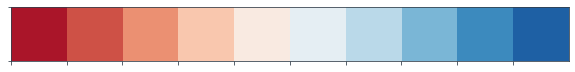

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Styles from https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.frameon'] = False

dark_grey = '#333F4B'
plt.rcParams['text.color'] = dark_grey
keys = [
    'axes.edgecolor',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color'
]
for key in keys:
    plt.rcParams[key] = dark_grey

palette = sns.color_palette('RdBu', 10)
sns.palplot(palette)

Plot the degree distribution of CoDEx datasets.

In [14]:
def count_entities(triples):
    """
    :param triples: pandas DataFrame [head, relation, tail]
    :return counts: pandas Dataframe [entity, count]
    """
    entities = pd.concat((triples['head'], triples['tail']))
    counts = pd.DataFrame(entities.value_counts().reset_index())
    counts.columns = ['entity', 'count']
    return counts
    
    
def count_relations(triples):
    """
    :param triples: pandas DataFrame [head, relation, tail]
    :return counts: pandas Dataframe [relation, count]
    """
    counts = pd.DataFrame(triples['relation'].value_counts().reset_index())
    counts.columns = ['relation', 'count']
    return counts

In [15]:
def plot_degree_distribution(
        triples, step=5, ax=None, 
        figsize=(5,3), **kwargs):
    """
    :param triples:
    :param step:
    :param ax:
    :param figsize:
    :param kwargs:
    :return:
    """
    counts = count_entities(triples)['count']
    
    x = np.arange(0, max(counts), step)
    y = [len(counts[counts > val]) for val in x]
    y = np.array(y, dtype=np.float32)

    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    
    ax.scatter(x, y, alpha=0.5, **kwargs)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    
    ax.set_xlabel('Entity degree', fontsize=14)
    ax.set_ylabel(r'Cumulative count', fontsize=12)
    
    ax.tick_params(
        which='both',
        labelsize=12
    )
    
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)

    return ax

/x/tsafavi/codex/venv/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/x/tsafavi/codex/venv/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


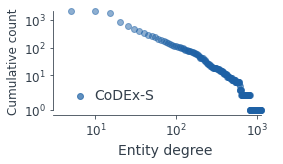

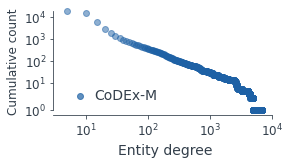

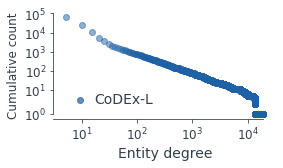

In [16]:
for size in sizes:
    codex = Codex(size=size)
    triples = codex.triples()

    ax = plot_degree_distribution(
        triples, 
        color=palette[-1],
        step=5,
        figsize=(4, 2),
        label=codex.name(),
    )

    legend = ax.legend(
        frameon=False, 
        fontsize=14,
        handletextpad=0.001,
        labelspacing=0.2,
        loc=3
    )

    for text in legend.get_texts():
        text.set_color(dark_grey)

    for lh in legend.legendHandles: 
        lh.set_alpha(0.7)

    xlim = ax.get_xlim()
    ax.set_xlim(3, max(xlim))

    plt.show()

Plot the top-k entities and relations in a CoDEx dataset.

In [17]:
def plot_top_k(count_df, k=30, 
               label_col='label',
               count_col='count',
               figsize=(5,8.5),
               color='#007acc',
               ax=None,
               **kwargs):
    count_df = count_df.sort_values(count_col, ascending=False).head(k)
    top_labels, top_counts = count_df[label_col], count_df[count_col]
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    x = np.arange(k)
    y = top_counts[::-1]
        
    ax.hlines(
        y=x,
        xmin=0, 
        xmax=y, 
        color=color, 
        alpha=0.2, 
        linewidth=5,
        **kwargs
    )
    
    ax.plot(
        y, x, "o", 
        markersize=7, 
        color=color, 
        alpha=0.6)
    
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    ax.spines['left'].set_bounds(0, k - 1)
    ax.spines['bottom'].set_bounds(0, max(ax.get_xticks()))
    
    ax.set_xlabel('Count', fontsize=14)

    ax.set_yticks(x)
    ax.set_yticklabels(top_labels[::-1])
    
    return ax

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


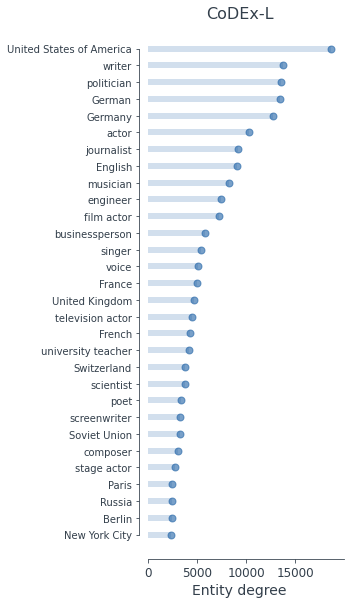

In [18]:
size = 'l'
codex = Codex(size=size)

triples = codex.triples()
count_df = count_entities(triples)

count_df['label'] = [codex.entity_label(eid) for eid in count_df['entity']]

k = 30

ax = plot_top_k(
    count_df, 
    k=k, 
    color=palette[-1],
    linewidths=6
)

ax.set_xscale('linear')
ax.set_xlabel('Entity degree', fontsize=14)
ax.set_title(codex.name(), fontsize=16)
ax.tick_params('x', labelsize=12)

plt.tight_layout()
plt.show()

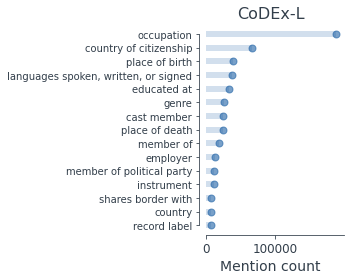

In [19]:
count_df = count_relations(triples)
count_df['label'] = [codex.relation_label(rid) for rid in count_df['relation']]

k = 15

ax = plot_top_k(
    count_df, 
    k=k, 
    color=palette[-1],
    linewidths=6,
    figsize=(5, 4)
)

ax.set_xscale('linear')
ax.set_xlabel('Mention count', fontsize=14)
ax.set_title(codex.name(), fontsize=16)
ax.tick_params('x', labelsize=12)

plt.tight_layout()
plt.show()

Investigate symmetry.

In [20]:
def entity_pairs(triples, reverse=False):
    col1, col2 = 'head', 'tail'
    if reverse:
        col1, col2 = col2, col1
    return set(zip(triples[col1], triples[col2]))

In [21]:
threshold = 0.5

for size in sizes: 
    codex = Codex(size=size)
    print('----------' + codex.name() + '----------')
    relations = codex.relations()
    triples = codex.triples()
    tot = 0
    
    for relation in relations:
        triples_r = triples[triples['relation'] == relation]
        
        forward, reverse = entity_pairs(triples_r), \
            entity_pairs(triples_r, reverse=True)
        symmetry = len(forward.intersection(reverse)) / len(forward)
        percent = len(triples_r) / len(triples)
        
        if symmetry > threshold:
            print(
                '  {} ({}) | {:.2f}% symmetry | {:.3f}% of {}'.format(
                    codex.relation_label(relation), 
                    relation,
                    symmetry * 100,
                    percent * 100,
                    codex.name()
                )
            )
            
            tot += (percent * 100)
                
    print('Symmetric relations > {:.1f} make up {:.2f}% of {}'.format(
        threshold, tot, codex.name()
    ))

----------CoDEx-S----------
  diplomatic relation (P530) | 97.08% symmetry | 16.890% of CoDEx-S
  spouse (P26) | 98.46% symmetry | 0.178% of CoDEx-S
  sibling (P3373) | 100.00% symmetry | 0.268% of CoDEx-S
  unmarried partner (P451) | 78.26% symmetry | 0.126% of CoDEx-S
Symmetric relations > 0.5 make up 17.46% of CoDEx-S
----------CoDEx-M----------
  diplomatic relation (P530) | 97.06% symmetry | 3.019% of CoDEx-M
  spouse (P26) | 97.00% symmetry | 0.420% of CoDEx-M
  sibling (P3373) | 98.09% symmetry | 0.381% of CoDEx-M
  unmarried partner (P451) | 83.97% symmetry | 0.191% of CoDEx-M
Symmetric relations > 0.5 make up 4.01% of CoDEx-M
----------CoDEx-L----------
  diplomatic relation (P530) | 96.80% symmetry | 1.026% of CoDEx-L
  spouse (P26) | 89.23% symmetry | 0.358% of CoDEx-L
  sibling (P3373) | 76.53% symmetry | 0.471% of CoDEx-L
  unmarried partner (P451) | 79.70% symmetry | 0.109% of CoDEx-L
  shares border with (P47) | 90.36% symmetry | 1.321% of CoDEx-L
Symmetric relations > 0

In [ ]:
threshold = 0.5

for size in sizes: 
    codex = Codex(size=size)
    print('----------' + codex.name() + '----------')
    relations = codex.relations()
    triples = codex.triples()
    tot = 0
    
    rows = []
    for relation in relations:
        triples_r = triples[triples['relation'] == relation]
        
        forward, reverse = entity_pairs(triples_r), \
            entity_pairs(triples_r, reverse=True)
        symmetry = len(forward.intersection(reverse)) / len(forward)
        percent = len(triples_r) / len(triples)
        
        if symmetry > threshold:
            rows.append((
                relation,
                symmetry * 100,
                percent * 100
            ))
                
    df = pd.DataFrame.from_records(
        rows, columns=['relation','symmetry','percent_of_triples']
    )
    df.to_csv(
        'analysis/symmetry/codex-{}/symmetry.tsv'.format(size),
        index=False, sep='\t'
    )

----------CoDEx-S----------
----------CoDEx-M----------


Investigate compositionality.

In [ ]:
import os

In [ ]:
def rule_relations(rule):
    return [item for item in rule.split(' ') if item.startswith('P')]

In [ ]:
for size in sizes:
    codex = Codex(size=size)
    name = codex.name()
    print('----------' + name + '----------')
    
    rule_df = pd.read_csv(
        os.path.join('analysis/paths', 'codex-{}'.format(size), 'paths.tsv'), sep='\t'
    )
        
    # Count number of paths in this core
    # Get the average confidence across all rules
    print(
        len(rule_df), 'paths in', name
    )
    print('Average confidence: {:.3f}'.format(
        rule_df['PCA Confidence'].mean()))
    print('n pos / n triples: {:.2f}%'.format(
        np.sum(np.multiply(rule_df['Positive Examples'], rule_df['Length'])) / len(codex.triples()) * 100
    ))
        
    # Print a few examples
    print('Examples:')
    for length in (2, 3):
        df = rule_df[rule_df['Length'] == length]
        sample = df.sample(n=1)
        rule, conf = sample['Rule'].iloc[0], sample['PCA Confidence'].iloc[0]
        relations = rule_relations(rule)
        
        print(
            ' ',
            '/'.join([codex.relation_label(relation) for relation in relations[:-1]]), 
            '->', 
            codex.relation_label(relations[-1]),
            '(confidence {:.3f})'.format(conf)
        )